# Universidade de Fortaleza
Mestrado em Ciência de Dados e Inteligência Artificial

Professor: Daniel Macedo

Aluno: Marcus Miranda

### Trabalho

1) Trabalhar os Realces das imagens

1.1 - Convolução

1.2 - Correlação


In [2]:
import timeit
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
def correlacao_comum(img, img_corr, mascara):
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            try:
                m =  img[x-1][y+1] * mascara[0][0]
                m += img[x-1][y]   * mascara[1][0]
                m += img[x-1][y-1] * mascara[2][0]

                m += img[x][y+1] * mascara[0][1]
                m += img[x][y]   * mascara[1][1]
                m += img[x][y-1] * mascara[2][1]
                
                m += img[x+1][y+1] * mascara[0][2]
                m += img[x+1][y]   * mascara[1][2]
                m += img[x+1][y-1] * mascara[2][2]

                img_corr[x][y] = m/9
            except:
                continue
    return img_corr

In [4]:
def correlacao_rapida(img, img_corr, mascara):
    img_corr_rap = np.zeros(np.array(img.shape) + np.array(mascara.shape) - 1)
    for x in range(mascara.shape[0]):
        for y in range(mascara.shape[1]):
            img_corr_rap[x:x+img.shape[0], y:y+img.shape[1]] += img * mascara[x,y]
        return img_corr_rap.astype('uint8')

In [5]:
img = cv2.imread('lena.png', 0)

In [6]:
img_corr = cv2.imread('lena.png', 0)

In [7]:
mascara = np.array([ [1,1,1], [1,1,1], [1,1,1] ])

In [8]:
time_start = timeit.default_timer()

In [9]:
img_corr_comum = correlacao_comum(img, img_corr, mascara)

In [10]:
time_end = timeit.default_timer()

In [11]:
time = time_end - time_start
print('Tempo de processamento Comum:', time, 'segundos')

Tempo de processamento Comum: 5.639127800000011 segundos


In [12]:
time_start = timeit.default_timer()

In [13]:
img_corr_rapida = correlacao_rapida(img, img_corr, mascara)

In [14]:
time_end = timeit.default_timer()

In [15]:
time = time_end - time_start

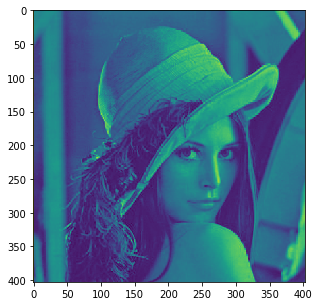

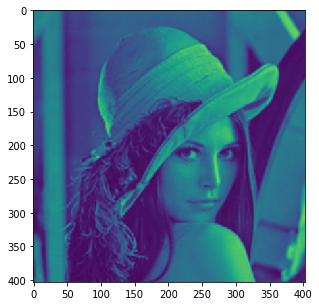

In [16]:
_, ax1 = plt.subplots(figsize=(10,5))
ax1.imshow(img)

_, ax1 = plt.subplots(figsize=(10,5))
ax1.imshow(img_corr_comum)

### Conclusão

É possível ver que a imagem resultante da convolução teve um leve “borramento”.